# Problem Statement:

### Consider that a real estate company has the data of real estate prices in Delhi. The company wants to optimise the selling price of the properties, based on important factors such as area, bedrooms, parking, etc.

### Essentially, the company wants:

1. To identify the variables affecting house prices, e.g., area, number of rooms, bathrooms, etc.
2. To create a linear model that quantitatively relates house prices with variables, such as the number of rooms, area, number of bathrooms, etc.
3. To know the accuracy of the model, i.e. how well do these variables predict the house prices


### Steps:

1. Reading, understanding and visualizing the data set
2. Splittting the data set into test and train, scaling feautres for better intrepretation
3. Training the model
4. Residual Analysis
5. Prediction and evaluation fo the model on Test data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.model_selection import train_test_split
import statsmodels
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

#### Importing the file

In [2]:
hou=pd.read_csv('Housing.csv')

In [3]:
hou.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
##Checking the shape of the dataframe
hou.shape

(545, 13)

In [5]:
#Checking the info to get the understanding of the missing values.
hou.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


- In our data set we have no missing values and all the attributes are  as per the datatype they should be.

In [6]:
##Checking the statistical summary
hou.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


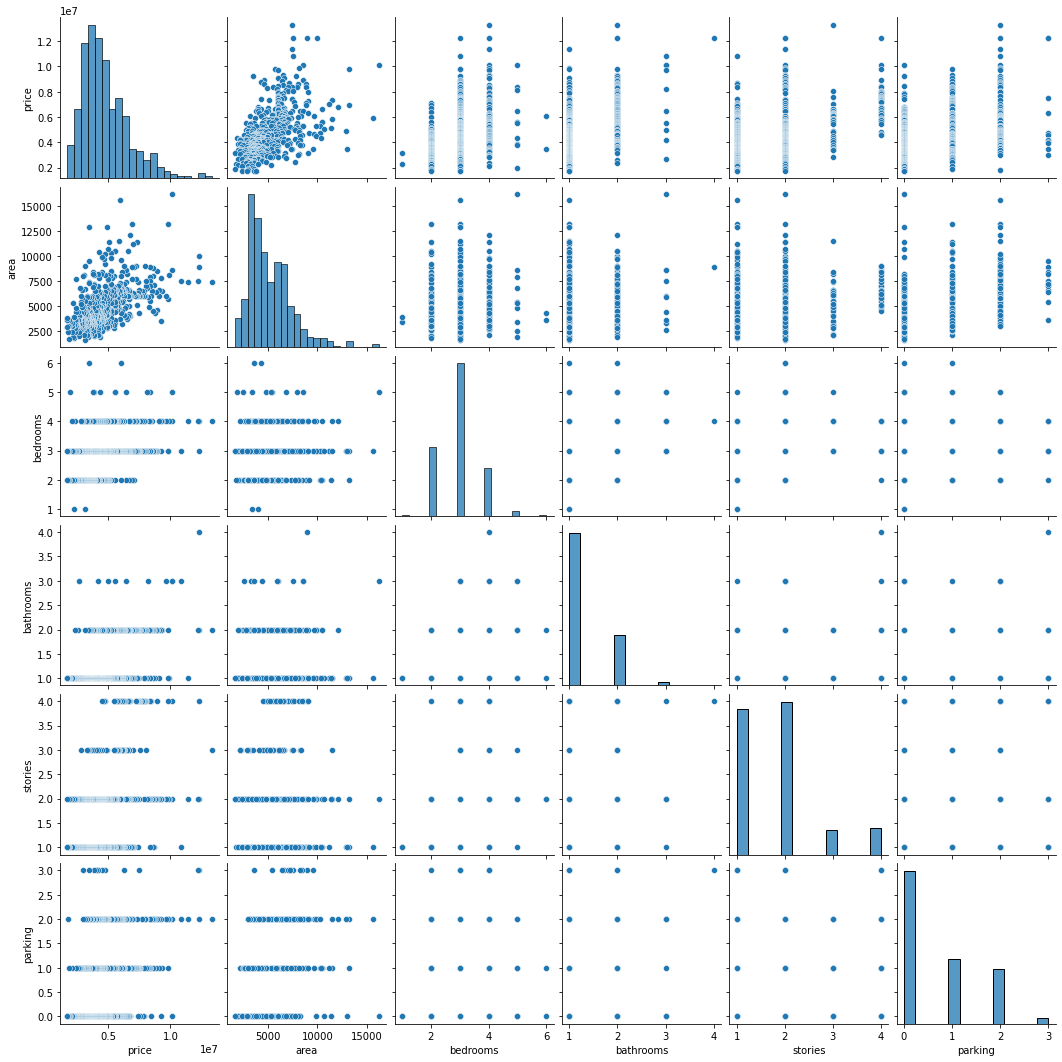

In [7]:
## Visualizing the numerical variables
sns.pairplot(hou)
plt.show()

- On checking if we should proceed with the linear regression as an algorithm, we checked if our target variable that is the price is actually explained by some variables or not, if there is any sort of correlation with the predictor variables. It  could be seen that there  is some sort of pattern with respect to the attrbutes and thus we can say that there is defniitely a contribution of these variables to our predictor variable. Hence we can go ahead  with Linear Regression as a technique.

In [8]:
hou.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [9]:
##Let's segregate the numeric and categorical variables
num=[]
cat=[]
for i in hou.columns:
    if hou[i].dtype=='int64':
        num.append(i)
    else:
        cat.append(i)

In [10]:
num

['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

In [11]:
cat

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']

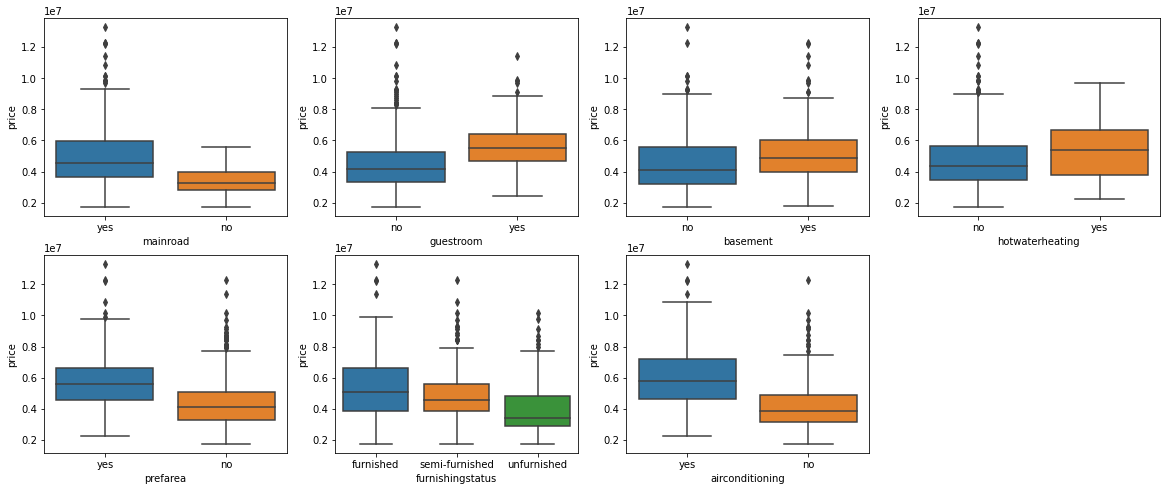

In [12]:
##Now,let's see for the categorical variables.
plt.figure(figsize=[20,8])
plt.subplot(2,4,1)

sns.boxplot(hou['mainroad'], hou['price'])

plt.subplot(2,4,2)
sns.boxplot(hou['guestroom'], hou['price'])

plt.subplot(2,4,3)
sns.boxplot(hou['basement'], hou['price'])

plt.subplot(2,4,4)
sns.boxplot(hou['hotwaterheating'], hou['price'])

plt.subplot(2,4,5)
sns.boxplot(hou['prefarea'], hou['price'])

plt.subplot(2,4,6)
sns.boxplot(hou['furnishingstatus'], hou['price'])

plt.subplot(2,4,7)
sns.boxplot(hou['airconditioning'], hou['price'])

plt.show()

### Now that, we have studeid how different attributes varies with respect to price, we have a fair idea about our dataset. So, now since our data is clean and we have undrstood th attributes let's go ahead with the Data preparation and modelling.

### Encoding the categorical variables with binary values
- Categorical values with yes will be replaced with 1
- Categorical values with no will be replaced with 0

In [13]:
##List containing such variables.

bin_list=['mainroad','airconditioning','prefarea','guestroom','basement','hotwaterheating']
hou[bin_list].head()

,mainroad,airconditioning,prefarea,guestroom,basement,hotwaterheating
0,yes,yes,yes,no,no,no
1,yes,yes,no,no,no,no
2,yes,no,yes,no,yes,no
3,yes,yes,yes,no,yes,no
4,yes,yes,no,yes,yes,no


In [14]:
##Converting to ones and zeros
hou[bin_list]=hou[bin_list].apply(lambda x: x.map({'yes':1,'no':0}))

In [15]:
hou.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


-  Now I have got the attributes encoded to ones and zeros.

## Dummy Variables

In [16]:
#creating dummy variables for furnishingstatus attribute
status=pd.get_dummies(hou['furnishingstatus'])
status.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


- As it is known that  if we have a categorical variable with k levels so the number of dummy variable would beurni k-1.

- The idea behind this is to make modelling efficient and easy intpretation.So we would now drop off one column and we would interpretate it the way below:
    - if 00 then 'Furnished'
    - if 10 then 'Semi-Furnished'
    - if 01 then ' Unfurnished'

In [17]:
#dropping  the first column
status=pd.get_dummies(hou['furnishingstatus'], drop_first=True)
status.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [18]:
##Now we willconcat these two dataframe 
hou=pd.concat([hou,status], axis=1)

In [19]:
hou.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [20]:
##Now we do not need furnishingstattus, so we would drop the column
hou.drop('furnishingstatus', axis=1, inplace=True)

In [21]:
hou

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


- Here we complete all our encoding steps and I have removed all the categorical variables.

### The next steps would be:
- Splitting the data set into train and test
- Rescaling of Variables.

In [226]:
##Splitting the data set into train and test
df_train, df_test=train_test_split(hou, train_size=0.7,random_state=100)

In [227]:
print(df_train.shape)
print(df_test.shape)

(381, 14)
(164, 14)


- Now as we have segregated the data set into train and test, so the test part would be completely unknown to the model.

- We would now rescale only the values of the train set and  keep the values as it is on training data set.

- For rescaling we would use  here MinMax scaler.

In [228]:
##Import library for scaling
from sklearn.preprocessing import MinMaxScaler

In [229]:
num

['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

In [230]:
scaler=MinMaxScaler() ##instantiate the object to the class
df_train[num]=scaler.fit_transform(df_train[num])

In [231]:
##Inspecting the training data frame
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


In [232]:
##restting the index
df_train.reset_index(inplace=True, drop=True)

In [233]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
1,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
2,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
3,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
4,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


## Buid the  model

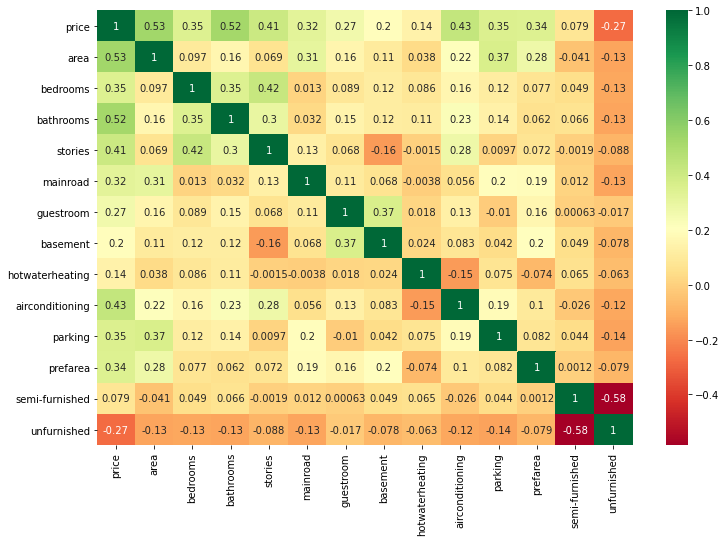

In [234]:
##Plotting correlation values for attributes and plotting in heatmap
plt.figure(figsize=[12,8])
sns.heatmap(df_train.corr(), cmap='RdYlGn', annot=True)
plt.show()

- Technique that  would apply over here is Manual selection of attributes
- Checking model score and statistical signficance of each attributes 
- Will be using statsmodel to check statistical parameters and then decide which attribute to keep

In [235]:
##Let's segregate the X_train and y_train from df_train
y_train=df_train.pop('price')
X_train=df_train

In [236]:
X_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
1,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
2,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
3,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
4,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


In [237]:
y_train

0      0.169697
1      0.615152
2      0.321212
3      0.548133
4      0.575758
         ...   
376    0.048485
377    0.484848
378    0.175758
379    0.424242
380    0.060606
Name: price, Length: 381, dtype: float64

- Our first attribute is area because it has a higher correlation with the price so we have chose area as the first one to build our model

- We would then further check which attribute on addition would help to describe more variation in y with the variation in X.

In [238]:
##Using statsmmodel
##Add a constant
X_train_sm=sm.add_constant(X_train['area'])

##Using OLS creating first model
lr=sm.OLS(y_train, X_train_sm)

##Fit the model
lr_model=lr.fit()

##Checking the parameters
lr_model.params

const    0.126894
area     0.462192
dtype: float64

In [239]:
##Checking summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     149.6
Date:                Fri, 23 Jul 2021   Prob (F-statistic):           3.15e-29
Time:                        00:14:59   Log-Likelihood:                 227.23
No. Observations:                 381   AIC:                            -450.5
Df Residuals:                     379   BIC:                            -442.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1269      0.013      9.853      0.000       0.102       0.152
area           0.4622      0.038     12.232      0.000       0.388       0.536
==============================================================================
Omnibus:                       67.313   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.063
Skew:                           0.925   Prob(JB):                     8.59e-32
Kurtosis:                       5.365   Cond. No.                         5.99
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Observations

- R squared value is 28% which is not that bad as area is able to explain 28% of the variation in price.
- Checking  the p value we are able to see that coeffcients are significant and hence it is understood from the above pairplots and heatmap.
- Probability of F stats is also very low which signifies that the model fit is  not by chance  and it has some signifcance
- AIC is negative which broadly suggests that information is not lost to that that extent.

In [240]:
##Let's try to improve our model and see how statistical parameters change
##On checking bathrooms has next higher correlation with the price.
##So we would add bathrooms and would seewhat impact does it have on R squared, adjusted r  squared and what's the significance.

X_train_sm=X_train[['area','bathrooms']]
X_train_sm=sm.add_constant(X_train_sm)
lr=sm.OLS(y_train, X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     174.1
Date:                Fri, 23 Jul 2021   Prob (F-statistic):           2.51e-54
Time:                        00:14:59   Log-Likelihood:                 288.24
No. Observations:                 381   AIC:                            -570.5
Df Residuals:                     378   BIC:                            -558.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1046      0.011      9.384      0.000       0.083       0.127
area           0.3984      0.033     12.192      0.000       0.334       0.463
bathrooms      0.2984      0.025     11.945      0.000       0.249       0.347
==============================================================================
Omnibus:                       62.839   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.790
Skew:                           0.784   Prob(JB):                     2.23e-37
Kurtosis:                       5.859   Cond. No.                         6.17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Observations

- R squared value is 48% which has increased a lot and now area and bathroom is able to explain 28% of the variation in price.
- Checking  the p value we are able to see that coeffcients are significant and hence it is understood from the above pairplots and heatmap.
- Probability of F stats is also very low which signifies that the model fit is  not by chance  and it has some signifcance
- AIC is negative which broadly suggests that information is not lost to that that extent.

In [241]:
##now, lets add  bedroom
X_train_sm=X_train[['area','bathrooms','bedrooms']]
X_train_sm=sm.add_constant(X_train_sm)
lr=sm.OLS(y_train, X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     128.2
Date:                Fri, 23 Jul 2021   Prob (F-statistic):           3.12e-57
Time:                        00:14:59   Log-Likelihood:                 297.76
No. Observations:                 381   AIC:                            -587.5
Df Residuals:                     377   BIC:                            -571.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0414      0.018      2.292      0.022       0.006       0.077
area           0.3922      0.032     12.279      0.000       0.329       0.455
bathrooms      0.2600      0.026     10.033      0.000       0.209       0.311
bedrooms       0.1819      0.041      4.396      0.000       0.101       0.263
==============================================================================
Omnibus:                       50.037   Durbin-Watson:                   2.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.806
Skew:                           0.648   Prob(JB):                     7.92e-28
Kurtosis:                       5.487   Cond. No.                         8.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [242]:
##adding guestroom
X_train_sm=X_train[['area','bathrooms','bedrooms','guestroom']]
X_train_sm=sm.add_constant(X_train_sm)
lr=sm.OLS(y_train, X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     101.9
Date:                Fri, 23 Jul 2021   Prob (F-statistic):           1.06e-58
Time:                        00:14:59   Log-Likelihood:                 303.76
No. Observations:                 381   AIC:                            -597.5
Df Residuals:                     376   BIC:                            -577.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0398      0.018      2.236      0.026       0.005       0.075
area           0.3776      0.032     11.886      0.000       0.315       0.440
bathrooms      0.2502      0.026      9.736      0.000       0.200       0.301
bedrooms       0.1770      0.041      4.337      0.000       0.097       0.257
guestroom      0.0529      0.015      3.468      0.001       0.023       0.083
==============================================================================
Omnibus:                       52.454   Durbin-Watson:                   2.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.824
Skew:                           0.654   Prob(JB):                     2.63e-31
Kurtosis:                       5.676   Cond. No.                         9.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [243]:
##adding basement
X_train_sm=X_train[['area','bathrooms','bedrooms','guestroom','basement']]
X_train_sm=sm.add_constant(X_train_sm)
lr=sm.OLS(y_train, X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     82.01
Date:                Fri, 23 Jul 2021   Prob (F-statistic):           5.08e-58
Time:                        00:14:59   Log-Likelihood:                 304.59
No. Observations:                 381   AIC:                            -597.2
Df Residuals:                     375   BIC:                            -573.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0374      0.018      2.094      0.037       0.002       0.073
area           0.3759      0.032     11.832      0.000       0.313       0.438
bathrooms      0.2490      0.026      9.691      0.000       0.198       0.299
bedrooms       0.1731      0.041      4.235      0.000       0.093       0.254
guestroom      0.0457      0.016      2.811      0.005       0.014       0.078
basement       0.0163      0.013      1.282      0.201      -0.009       0.041
==============================================================================
Omnibus:                       54.368   Durbin-Watson:                   2.141
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.252
Skew:                           0.682   Prob(JB):                     4.74e-32
Kurtosis:                       5.688   Cond. No.                         9.54
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### We can continue with this process until we have  limited variables to work with, however this is a tedious process if we would have a lot of variales to deal with. So, here what we would do is to use a new technique called Backward selection, where we would add all  the variables at one go and then we can decide which one to keep and which one to not. The above technique is called Forward Selection.

### Building model  with all the variables.

In [244]:
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train, X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     60.40
Date:                Fri, 23 Jul 2021   Prob (F-statistic):           8.83e-83
Time:                        00:15:00   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -735.6
Df Residuals:                     367   BIC:                            -680.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0200      0.021      0.955      0.340      -0.021       0.061
area                0.2347      0.030      7.795      0.000       0.175       0.294
bedrooms            0.0467      0.037      1.267      0.206      -0.026       0.119
bathrooms           0.1908      0.022      8.679      0.000       0.148       0.234
stories             0.1085      0.019      5.661      0.000       0.071       0.146
mainroad            0.0504      0.014      3.520      0.000       0.022       0.079
guestroom           0.0304      0.014      2.233      0.026       0.004       0.057
basement            0.0216      0.011      1.943      0.053      -0.000       0.043
hotwaterheating     0.0849      0.022      3.934      0.000       0.042       0.127
airconditioning     0.0669      0.011      5.899      0.000       0.045       0.089
parking             0.0607      0.018      3.365      0.001       0.025       0.096
prefarea            0.0594      0.012      5.040      0.000       0.036       0.083
semi-furnished      0.0009      0.012      0.078      0.938      -0.022       0.024
unfurnished        -0.0310      0.013     -2.440      0.015      -0.056      -0.006
==============================================================================
Omnibus:                       93.687   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              304.917
Skew:                           1.091   Prob(JB):                     6.14e-67
Kurtosis:                       6.801   Cond. No.                         14.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Observations:

1. We  have included all the variales in the model and hence had a look at the statistics as how the coeffiecient of the variables  are significant.  Few variables are on high p values and we will drop them as it  will not explain enough variation in the target variable.
    - The way to drop the variables is with the help of P values corresponding to each variable. We  would assume the significance level to be 0.05 and any P value above that range would not be accepted.
    - Also we would look at the variation inflation factor (VIF) to explain multicollinearity between independent variables and that would be the second approach to drop the variables.

In [245]:
##Importing library to find out VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [246]:
#Calculating VIF
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif.sort_values('VIF', ascending=False)

,Features,VIF
1,bedrooms,7.33
4,mainroad,6.02
0,area,4.67
3,stories,2.70
11,semi-furnished,2.19
9,parking,2.12
6,basement,2.02
12,unfurnished,1.82
8,airconditioning,1.77
2,bathrooms,1.67


Observation:

- I could see that the bedroom even being a significant variable in the model has a high VIF, which means there is a high multi_collinearity between bedroom and other independent variables excluding target variable.

- As we discussed the ways to drop a variable, there could be three conditions:
    - High VIF, High p value -> Simply drop the variable 
    - Low VIF, Low p value  -> Do not drop the variable
    - High-Low conditions:
        - High p, Low VIF -> Drop these variables first
        - High VIF, low p -> Drop these variables secondly( As removing the variables  with high p values and rebuilding the model would decrease the VIF significantly, so there is a chance of keeping a significant variable than an insignnifacnt variable)

In [247]:
##Removing semi-furnished(high P value) and rebuilding the model
X_train_1=X_train.drop('semi-furnished', axis=1)

In [248]:
##Rebuilding model
X_train_sm=sm.add_constant(X_train_1)
lr=sm.OLS(y_train, X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     65.61
Date:                Fri, 23 Jul 2021   Prob (F-statistic):           1.07e-83
Time:                        00:15:00   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -737.6
Df Residuals:                     368   BIC:                            -686.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0207      0.019      1.098      0.273      -0.016       0.058
area                0.2344      0.030      7.845      0.000       0.176       0.293
bedrooms            0.0467      0.037      1.268      0.206      -0.026       0.119
bathrooms           0.1909      0.022      8.697      0.000       0.148       0.234
stories             0.1085      0.019      5.669      0.000       0.071       0.146
mainroad            0.0504      0.014      3.524      0.000       0.022       0.079
guestroom           0.0304      0.014      2.238      0.026       0.004       0.057
basement            0.0216      0.011      1.946      0.052      -0.000       0.043
hotwaterheating     0.0849      0.022      3.941      0.000       0.043       0.127
airconditioning     0.0668      0.011      5.923      0.000       0.045       0.089
parking             0.0608      0.018      3.372      0.001       0.025       0.096
prefarea            0.0594      0.012      5.046      0.000       0.036       0.083
unfurnished        -0.0316      0.010     -3.096      0.002      -0.052      -0.012
==============================================================================
Omnibus:                       93.538   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              303.844
Skew:                           1.090   Prob(JB):                     1.05e-66
Kurtosis:                       6.794   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [249]:
##Recalculating VIF
vif=pd.DataFrame()
vif['Features']=X_train_1.columns
vif['VIF']=[variance_inflation_factor(X_train_1.values, i) for i in range(X_train_1.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif.sort_values('VIF', ascending=False)

,Features,VIF
1,bedrooms,6.59
4,mainroad,5.68
0,area,4.67
3,stories,2.69
9,parking,2.12
6,basement,2.01
8,airconditioning,1.77
2,bathrooms,1.67
10,prefarea,1.51
5,guestroom,1.47


- On removing semi_furnished, VIF decreased but not that significantly which  could be ignored.

- Now on checking further we could see that bedrooms, mainroad and area has higher VIF and among these the least significant is bedrooms. Since this comes under high p and high VIF, we would go ahead and drop the variable.

In [250]:
##Removing bedrooms(high P value, high VIF) and rebuilding the model
X_train_2=X_train_1.drop('bedrooms', axis=1)

In [251]:
##Rebuilding model
X_train_sm=sm.add_constant(X_train_2)
lr=sm.OLS(y_train, X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     71.31
Date:                Fri, 23 Jul 2021   Prob (F-statistic):           2.73e-84
Time:                        00:15:00   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -737.9
Df Residuals:                     369   BIC:                            -690.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0357      0.015      2.421      0.016       0.007       0.065
area                0.2347      0.030      7.851      0.000       0.176       0.294
bathrooms           0.1965      0.022      9.132      0.000       0.154       0.239
stories             0.1178      0.018      6.654      0.000       0.083       0.153
mainroad            0.0488      0.014      3.423      0.001       0.021       0.077
guestroom           0.0301      0.014      2.211      0.028       0.003       0.057
basement            0.0239      0.011      2.183      0.030       0.002       0.045
hotwaterheating     0.0864      0.022      4.014      0.000       0.044       0.129
airconditioning     0.0665      0.011      5.895      0.000       0.044       0.089
parking             0.0629      0.018      3.501      0.001       0.028       0.098
prefarea            0.0596      0.012      5.061      0.000       0.036       0.083
unfurnished        -0.0323      0.010     -3.169      0.002      -0.052      -0.012
==============================================================================
Omnibus:                       97.661   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              325.388
Skew:                           1.130   Prob(JB):                     2.20e-71
Kurtosis:                       6.923   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [252]:
##Recalculating VIF
vif=pd.DataFrame()
vif['Features']=X_train_2.columns
vif['VIF']=[variance_inflation_factor(X_train_2.values, i) for i in range(X_train_2.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif.sort_values('VIF', ascending=False)

,Features,VIF
3,mainroad,4.79
0,area,4.55
2,stories,2.23
8,parking,2.10
5,basement,1.87
7,airconditioning,1.76
1,bathrooms,1.61
9,prefarea,1.50
4,guestroom,1.46
10,unfurnished,1.33


### Observations:

- On checking the model , we could see some VIF values close to 5 but not more than 5. 
- We can keep those variables as on checking they are significant for the prediction.
- Hence we have got our final model for which has the above features.
- Further we will do residual analysis and evaluate the model on test dataset.

## Residual Analysis.

In [253]:
X_train_2.shape

(381, 11)

In [254]:
##predicting the values
y_train_pred=lr_model.predict(X_train_sm)

In [255]:
#Calculating residuals
res=y_train-y_train_pred

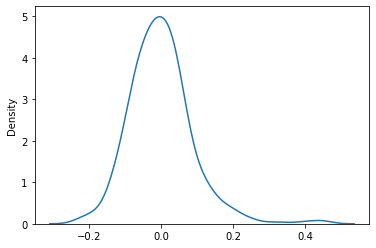

In [256]:
##Plotting the residuals to see if they follow normal distribution or not.
sns.distplot(res, hist=False)
plt.show()

## Checking variance of each attribute

## Prediction on the test data set

In [269]:
df_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,4403000,2880,3,1,2,1,0,0,0,0,0,1,1,0
54,7350000,6000,3,2,2,1,1,0,0,1,1,0,1,0
171,5250000,10269,3,1,1,1,0,0,0,0,1,1,1,0
244,4550000,5320,3,1,2,1,1,1,0,0,0,1,1,0
268,4382000,4950,4,1,2,1,0,0,0,1,0,0,1,0


In [270]:
##Doing the necessary preprocessing on the test data as  per the train data.
df_test[num]=scaler.transform(df_test[num])

In [271]:
df_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,0.229697,0.091869,0.4,0.0,0.333333,1,0,0,0,0,0.000000,1,1,0
54,0.484848,0.366420,0.4,0.5,0.333333,1,1,0,0,1,0.333333,0,1,0
171,0.303030,0.742080,0.4,0.0,0.000000,1,0,0,0,0,0.333333,1,1,0
244,0.242424,0.306582,0.4,0.0,0.333333,1,1,1,0,0,0.000000,1,1,0
268,0.227879,0.274023,0.6,0.0,0.333333,1,0,0,0,1,0.000000,0,1,0


In [272]:
##Keeping only those features that are required for the model.
df_test.drop(['semi-furnished', 'bedrooms'], axis=1, inplace=True)

In [273]:
###Splitting df_test
y_test=df_test.pop('price')
X_test=df_test

In [274]:
##Adding the constant
X_test_sm=sm.add_constant(X_test)

In [275]:
##Predict the price
y_test_pred=lr_model.predict(X_test_sm)

In [276]:
##Evaluate the model
print('R sqaured  for Training set:',r2_score(y_true=y_train, y_pred=y_train_pred))
print('R sqaured  for Test set:',r2_score(y_true=y_test, y_pred=y_test_pred))

R sqaured  for Training set: 0.6800930630265903
R sqaured  for Test set: 0.6713505684480789


## Observation:

- On checking the r squared for train and test data, it is pretty much what we expected and notihng unusual.

- Moreover, we are also within the 5% tolerance level and we can also say that whatever the model has learnt on the train data is  able to generalise very well on the test data(unseen).

- Neither the model is underfitted nor overfitted.

In [277]:
X_train_sm=sm.add_constant(X_train_2)
lr=sm.OLS(y_train, X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     71.31
Date:                Fri, 23 Jul 2021   Prob (F-statistic):           2.73e-84
Time:                        00:15:04   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -737.9
Df Residuals:                     369   BIC:                            -690.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0357      0.015      2.421      0.016       0.007       0.065
area                0.2347      0.030      7.851      0.000       0.176       0.294
bathrooms           0.1965      0.022      9.132      0.000       0.154       0.239
stories             0.1178      0.018      6.654      0.000       0.083       0.153
mainroad            0.0488      0.014      3.423      0.001       0.021       0.077
guestroom           0.0301      0.014      2.211      0.028       0.003       0.057
basement            0.0239      0.011      2.183      0.030       0.002       0.045
hotwaterheating     0.0864      0.022      4.014      0.000       0.044       0.129
airconditioning     0.0665      0.011      5.895      0.000       0.044       0.089
parking             0.0629      0.018      3.501      0.001       0.028       0.098
prefarea            0.0596      0.012      5.061      0.000       0.036       0.083
unfurnished        -0.0323      0.010     -3.169      0.002      -0.052      -0.012
==============================================================================
Omnibus:                       97.661   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              325.388
Skew:                           1.130   Prob(JB):                     2.20e-71
Kurtosis:                       6.923   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Using RFE to build the model and will see what features we get

In [278]:
from sklearn.feature_selection import RFE

In [279]:
lm=LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [280]:
#using RFE for feature seElection
rfe=RFE(lm, 10)
rfe=rfe.fit(X_train, y_train)

In [281]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('area', True, 1),
 ('bedrooms', True, 1),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', True, 1),
 ('guestroom', True, 1),
 ('basement', False, 3),
 ('hotwaterheating', True, 1),
 ('airconditioning', True, 1),
 ('parking', True, 1),
 ('prefarea', True, 1),
 ('semi-furnished', False, 4),
 ('unfurnished', False, 2)]

## Interpreting this:
- We have got  all the festures that are there in X_train dataframe, but as we have explicitly shared the required number  of features as 10, we have got the list above  with a rfe_support as True.

- All the features that are associated with True as a boolean are the selected features for this model  and that is only 10,based  on the data understanding we can go ahead and increase this number.

- Ranking has been provided for  all the features that are associated with True as a rfe_support value and their ranking is 1. Othr features with ranking as False have been ranked accordinngly as 2,3  and 4.

In [282]:
##Features RFE selected
X_train_rfe=X_train.columns[rfe.support_]

In [283]:
X_train_rfe

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'hotwaterheating', 'airconditioning', 'parking', 'prefarea'],
      dtype='object')

In [284]:
##Features RFE not selected
X_train_notrfe=X_train.columns[~rfe.support_]
X_train_notrfe

Index(['basement', 'semi-furnished', 'unfurnished'], dtype='object')

In [285]:
##Now le's build a statsmodel and see how my modell looks like.
X_train_rfe=X_train[X_train_rfe]
X_train_rfe

,area,bedrooms,bathrooms,stories,mainroad,guestroom,hotwaterheating,airconditioning,parking,prefarea
0,0.155227,0.4,0.0,0.000000,1,0,0,0,0.333333,0
1,0.403379,0.4,0.5,0.333333,1,0,0,1,0.333333,1
2,0.115628,0.4,0.5,0.000000,1,1,0,1,0.000000,0
3,0.454417,0.4,0.5,1.000000,1,0,0,1,0.666667,0
4,0.538015,0.8,0.5,0.333333,1,0,1,0,0.666667,0
...,...,...,...,...,...,...,...,...,...,...
376,0.118268,0.2,0.0,0.000000,1,0,0,0,0.000000,0
377,0.291623,0.4,0.5,1.000000,1,0,0,1,0.666667,0
378,0.139388,0.2,0.0,0.333333,1,0,1,0,0.333333,0
379,0.366420,0.4,0.5,0.666667,1,1,0,1,0.000000,0


In [286]:
X_train_sm=sm.add_constant(X_train_rfe)
lr=sm.OLS(y_train, X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     74.89
Date:                Fri, 23 Jul 2021   Prob (F-statistic):           1.28e-82
Time:                        00:15:05   Log-Likelihood:                 374.65
No. Observations:                 381   AIC:                            -727.3
Df Residuals:                     370   BIC:                            -683.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0027      0.018      0.151      0.880      -0.033       0.038
area                0.2363      0.030      7.787      0.000       0.177       0.296
bedrooms            0.0661      0.037      1.794      0.074      -0.006       0.139
bathrooms           0.1982      0.022      8.927      0.000       0.155       0.242
stories             0.0977      0.019      5.251      0.000       0.061       0.134
mainroad            0.0556      0.014      3.848      0.000       0.027       0.084
guestroom           0.0381      0.013      2.934      0.004       0.013       0.064
hotwaterheating     0.0897      0.022      4.104      0.000       0.047       0.133
airconditioning     0.0711      0.011      6.235      0.000       0.049       0.093
parking             0.0637      0.018      3.488      0.001       0.028       0.100
prefarea            0.0643      0.012      5.445      0.000       0.041       0.088
==============================================================================
Omnibus:                       86.105   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              286.069
Skew:                           0.992   Prob(JB):                     7.60e-63
Kurtosis:                       6.753   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### On checking the model, bedrooms coefficient is not that signigicant if we consider alpha as 0.05. As the P value is higher for this attribute so we can go  ahead and drop the same.

In [287]:
##Doing manual selection, dropping bedrooms
X_train_rfe=X_train_rfe.drop('bedrooms',axis=1)

In [288]:
##Rebuilding model
X_train_sm=sm.add_constant(X_train_rfe)
lr=sm.OLS(y_train, X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     82.37
Date:                Fri, 23 Jul 2021   Prob (F-statistic):           6.67e-83
Time:                        00:15:05   Log-Likelihood:                 373.00
No. Observations:                 381   AIC:                            -726.0
Df Residuals:                     371   BIC:                            -686.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0242      0.013      1.794      0.074      -0.002       0.051
area                0.2367      0.030      7.779      0.000       0.177       0.297
bathrooms           0.2070      0.022      9.537      0.000       0.164       0.250
stories             0.1096      0.017      6.280      0.000       0.075       0.144
mainroad            0.0536      0.014      3.710      0.000       0.025       0.082
guestroom           0.0390      0.013      2.991      0.003       0.013       0.065
hotwaterheating     0.0921      0.022      4.213      0.000       0.049       0.135
airconditioning     0.0710      0.011      6.212      0.000       0.049       0.094
parking             0.0669      0.018      3.665      0.000       0.031       0.103
prefarea            0.0653      0.012      5.513      0.000       0.042       0.089
==============================================================================
Omnibus:                       91.542   Durbin-Watson:                   2.107
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              315.402
Skew:                           1.044   Prob(JB):                     3.25e-69
Kurtosis:                       6.938   Cond. No.                         10.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Observation:

- On removing bedrooms, the value of r squared seems to the be the same which indicates that attribute to  be a redundant. Hence dropping the predicting power remains the same.

- Checking for VIF, if any of them has a higher multi collinearity.

In [289]:
##Calculating VIF
vif=pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif.sort_values('VIF', ascending=False)
vif.reset_index(drop=True)

,Features,VIF
0,area,4.52
1,bathrooms,1.58
2,stories,2.12
3,mainroad,4.26
4,guestroom,1.30
5,hotwaterheating,1.12
6,airconditioning,1.75
7,parking,2.10
8,prefarea,1.47


### Residual Analysis

In [290]:
##Predictinf y_train_pred
y_train_pred=lr_model.predict(X_train_sm)

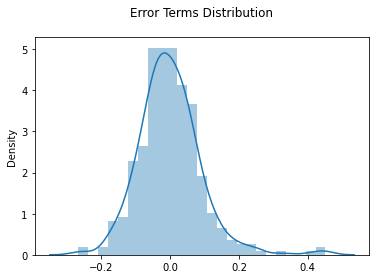

In [291]:
##Now, plotting the distribution of the error terms
sns.distplot(y_train-y_train_pred)
plt.title('Error Terms Distribution\n')
plt.show()

In [313]:
#Second error check, variance of all the terms should be equal
a=lr_model.params.values[1:].tolist()
b=lr_model.params.index[1:].tolist()


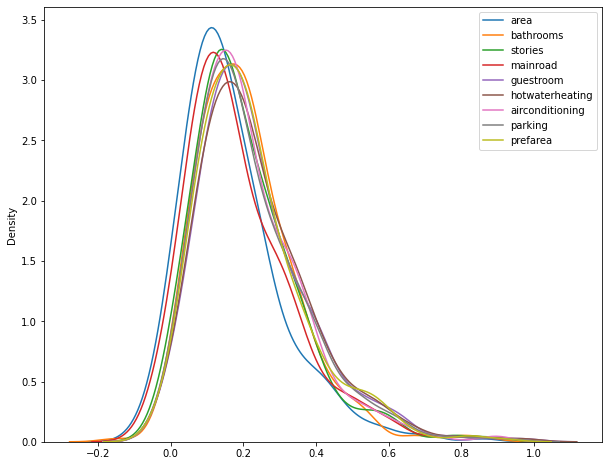

In [312]:
plt.figure(figsize=[10,8])
for i in range(len(a)):
    res_a=(y_train-(0.0242+a[i]*X_train.loc[:,b[i]]))
    sns.distplot(res_a, label=b[i], hist=False)
    plt.legend()
plt.show()

Observation:

- From the above plot, we  could see that that the variance of all the X_terms are same and there is no specific pattern

### Prediction  on the test data set

In [292]:
X_test_new=df_test[X_train_rfe.columns]

In [293]:
##Adding a constant
X_test_new=sm.add_constant(X_test_new)

In [294]:
#Predict y_test
y_test_pred=lr_model.predict(X_test_new)

In [295]:
##Check the r squared
print('R squared for test data is: ',r2_score(y_test, y_test1))

R squared for test data is:  0.6481740917926483


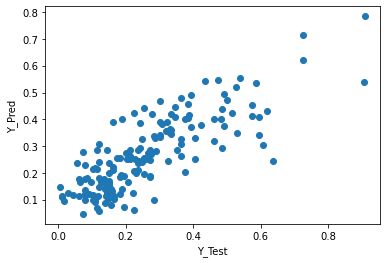

In [296]:
##Plotting y_test and y_pred
plt.scatter(y_test, y_test_pred)
plt.xlabel('Y_Test')
plt.ylabel('Y_Pred')
plt.show()